In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Set plot style
sns.set(style="whitegrid")

# Ignore all warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("/kaggle/input/wine-quality-dataset/WineQT.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


In [3]:
df.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  Id  
0      9.4        5   0  
1      9.8        5   1  
2      9.8        5   2  
3      9.8        6   3  
4      9.4        5   4

In [4]:
df.describe().T

count        mean         std      min        25%  \
fixed acidity         1143.0    8.311111    1.747595  4.60000    7.10000   
volatile acidity      1143.0    0.531339    0.179633  0.12000    0.39250   
citric acid           1143.0    0.268364    0.196686  0.00000    0.09000   
residual sugar        1143.0    2.532152    1.355917  0.90000    1.90000   
chlorides             1143.0    0.086933    0.047267  0.01200    0.07000   
free sulfur dioxide   1143.0   15.615486   10.250486  1.00000    7.00000   
total sulfur dioxide  1143.0   45.914698   32.782130  6.00000   21.00000   
density               1143.0    0.996730    0.001925  0.99007    0.99557   
pH                    1143.0    3.311015    0.156664  2.74000    3.20500   
sulphates             1143.0    0.657708    0.170399  0.33000    0.55000   
alcohol               1143.0   10.442111    1.082196  8.40000    9.50000   
quality               1143.0    5.657043    0.805824  3.00000    5.00000   
Id                    1143.0  804.969379  463.997116  0.00000  411.00000   

                            50%          75%         max  
fixed acidity           7.90000     9.100000    15.90000  
volatile acidity        0.52000     0.640000     1.58000  
citric acid             0.25000     0.420000     1.00000  
residual sugar          2.20000     2.600000    15.50000  
chlorides               0.07900     0.090000     0.61100  
free sulfur dioxide    13.00000    21.000000    68.00000  
total sulfur dioxide   37.00000    61.000000   289.00000  
density                 0.99668     0.997845     1.00369  
pH                      3.31000     3.400000     4.01000  
sulphates               0.62000     0.730000     2.00000  
alcohol                10.20000    11.100000    14.90000  
quality                 6.00000     6.000000     8.00000  
Id                    794.00000  1209.500000  1597.00000

In [5]:
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
Id                        int64
dtype: object

In [6]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64

In [7]:
df[df.duplicated()]

Empty DataFrame
Columns: [fixed acidity, volatile acidity, citric acid, residual sugar, chlorides, free sulfur dioxide, total sulfur dioxide, density, pH, sulphates, alcohol, quality, Id]
Index: []

In [8]:
df["quality"].unique()

array([5, 6, 7, 4, 8, 3])

In [9]:
df["quality"].value_counts()

quality
5    483
6    462
7    143
4     33
8     16
3      6
Name: count, dtype: int64

<h2>First Look Observations</h2>
<p>All input features in the dataset are numeric, with no missing (null) values. The target variable "quality" is numeric but can be treated as an ordinal categorical feature.</p>

<ul>
  <li><strong>Density and pH</strong> have low variance; they may be weak in explaining quality.</li>
  <li><strong>Alcohol</strong> shows relatively high variance; it could be an important factor for distinguishing quality.</li>
  <li><strong>Volatile acidity</strong> has moderate-to-high variance; as it affects taste and aroma, it may strongly explain quality.</li>
  <li><strong>Sulphates</strong> show noticeable variance; they could influence quality as a preservative component.</li>
  <li><strong>Total sulfur dioxide</strong> has a wide spread; it may create differing impacts on quality.</li>
  <li><strong>Residual sugar</strong> is mostly low but includes outliers; it might play a role in explaining quality in certain cases.</li>
</ul>


<Axes: >

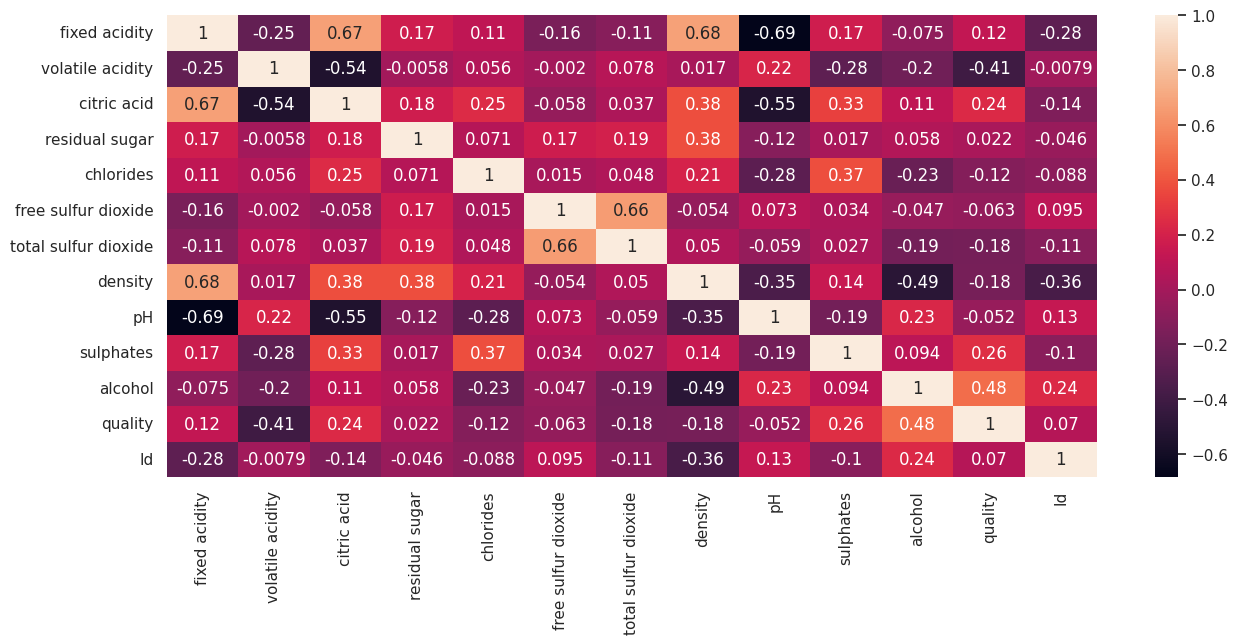

In [10]:
plt.figure(figsize=(15,6))
sns.heatmap(df.corr(),annot=True)

<h2>Heatmap Observations</h2>
<ul>
  <li><strong>Alcohol</strong> shows a relatively high positive correlation (0.48); it may be an important factor for distinguishing quality.</li>
  <li><strong>Sulphates</strong> and <strong>Citric acid</strong> show a moderate positive correlation (0.24–0.26); they could influence quality as preservative components.</li>
  <li><strong>Volatile acidity</strong> has a negative correlation (-0.41); it may reduce quality by negatively affecting taste and aroma.</li>
    <li><strong>Total Sulfur Dioxide</strong> has a negative correlation (-0.18); it may lower quality by causing undesirable chemical imbalances.</li>

</ul>


In [11]:
df.groupby("quality").mean()

fixed acidity  volatile acidity  citric acid  residual sugar  \
quality                                                                 
3             8.450000          0.897500     0.211667        2.666667   
4             7.809091          0.700000     0.165758        2.566667   
5             8.161077          0.585280     0.240124        2.540476   
6             8.317749          0.504957     0.263680        2.444805   
7             8.851049          0.393671     0.386573        2.760140   
8             8.806250          0.410000     0.432500        2.643750   

         chlorides  free sulfur dioxide  total sulfur dioxide   density  \
quality                                                                   
3         0.105333             8.166667             24.500000  0.997682   
4         0.094788            14.848485             40.606061  0.996669   
5         0.091770            16.612836             55.299172  0.997073   
6         0.085281            15.215368             39.941558  0.996610   
7         0.075217            14.538462             37.489510  0.996071   
8         0.070187            11.062500             29.375000  0.995553   

               pH  sulphates    alcohol           Id  
quality                                               
3        3.361667   0.550000   9.691667  1121.166667  
4        3.391212   0.637879  10.260606   692.848485  
5        3.302091   0.613375   9.902277   753.925466  
6        3.323788   0.676537  10.655339   854.625541  
7        3.287133   0.743566  11.482634   830.349650  
8        3.240625   0.766250  11.937500   797.875000

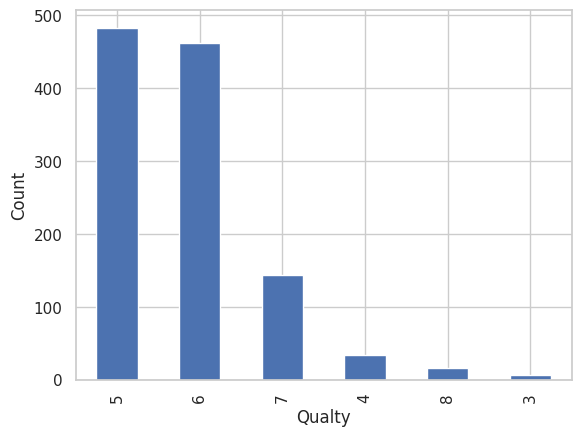

In [12]:
df["quality"].value_counts().plot(kind="bar")
plt.xlabel("Qualty")
plt.ylabel("Count")
plt.show()

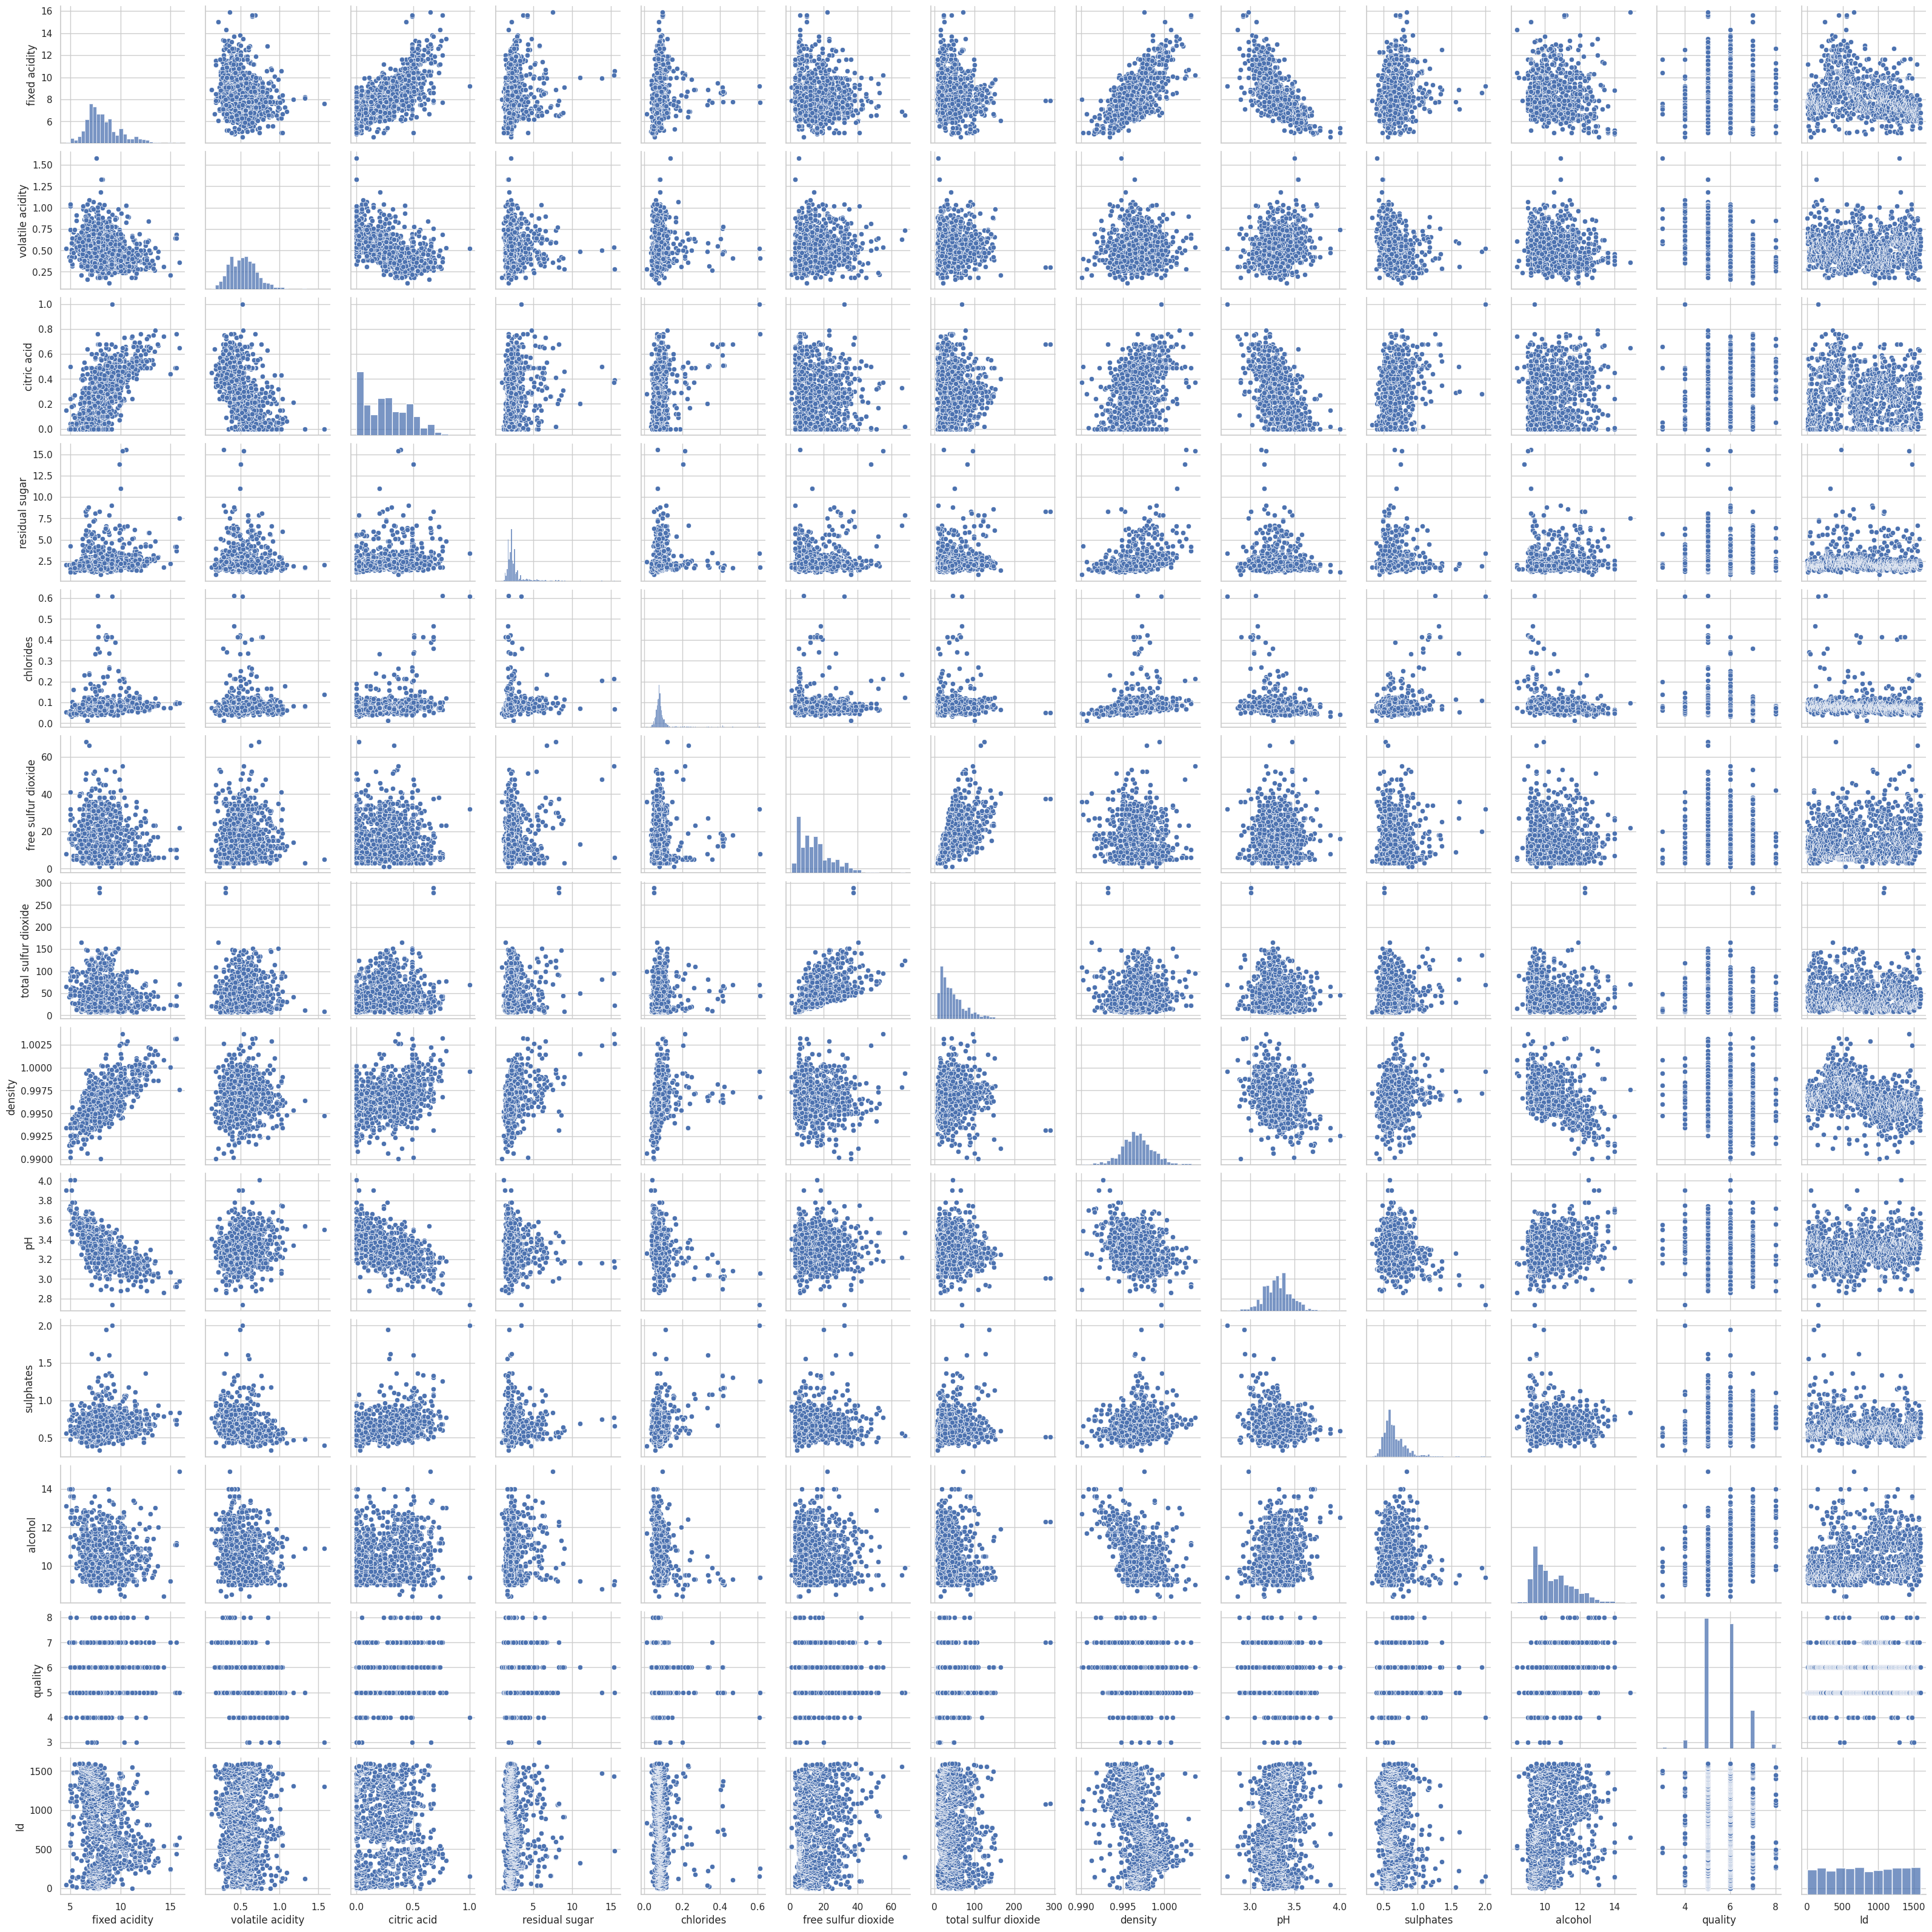

In [13]:
sns.pairplot(df)

In [14]:
import math
import seaborn as sns
import matplotlib.pyplot as plt

def draw_multivariate_plot(df, plot_type="box", target="quality",
                           cols=None, ncols=4, figsize=(25, 12), **kwargs):
    """
    Draws multiple plots (box, point, strip, scatter) comparing numeric features
    against a target variable (default = "quality").
    """

    # If no specific columns are given, select all numeric columns except the target
    if cols is None:
        cols = df.select_dtypes("number").columns.drop(target, errors="ignore").tolist()
    if not cols:
        raise ValueError("No columns found to plot.")

    # Map plot type strings to seaborn plotting functions
    plot_funcs = {
        "box": sns.boxplot,
        "point": sns.pointplot,
        "strip": sns.stripplot,
        "scatter": sns.scatterplot,
    }
    
    # Validate that the chosen plot_type is supported
    if plot_type not in plot_funcs:
        raise ValueError(f"Invalid plot_type: {plot_type}")
    

    n = len(cols)
    nrows = math.ceil(n / ncols)
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=figsize, squeeze=False)
    axes = axes.flatten()  
    f = plot_funcs[plot_type]

    for ax, col in zip(axes, cols):
        f(x=target, y=col, data=df, ax=ax, **kwargs)
        ax.set_title(f"{col} vs {target}")  
        ax.grid(True, alpha=0.3)            

    # Hide any unused subplot axes 
    for ax in axes[n:]:
        ax.set_visible(False)

    plt.tight_layout()
    plt.show()


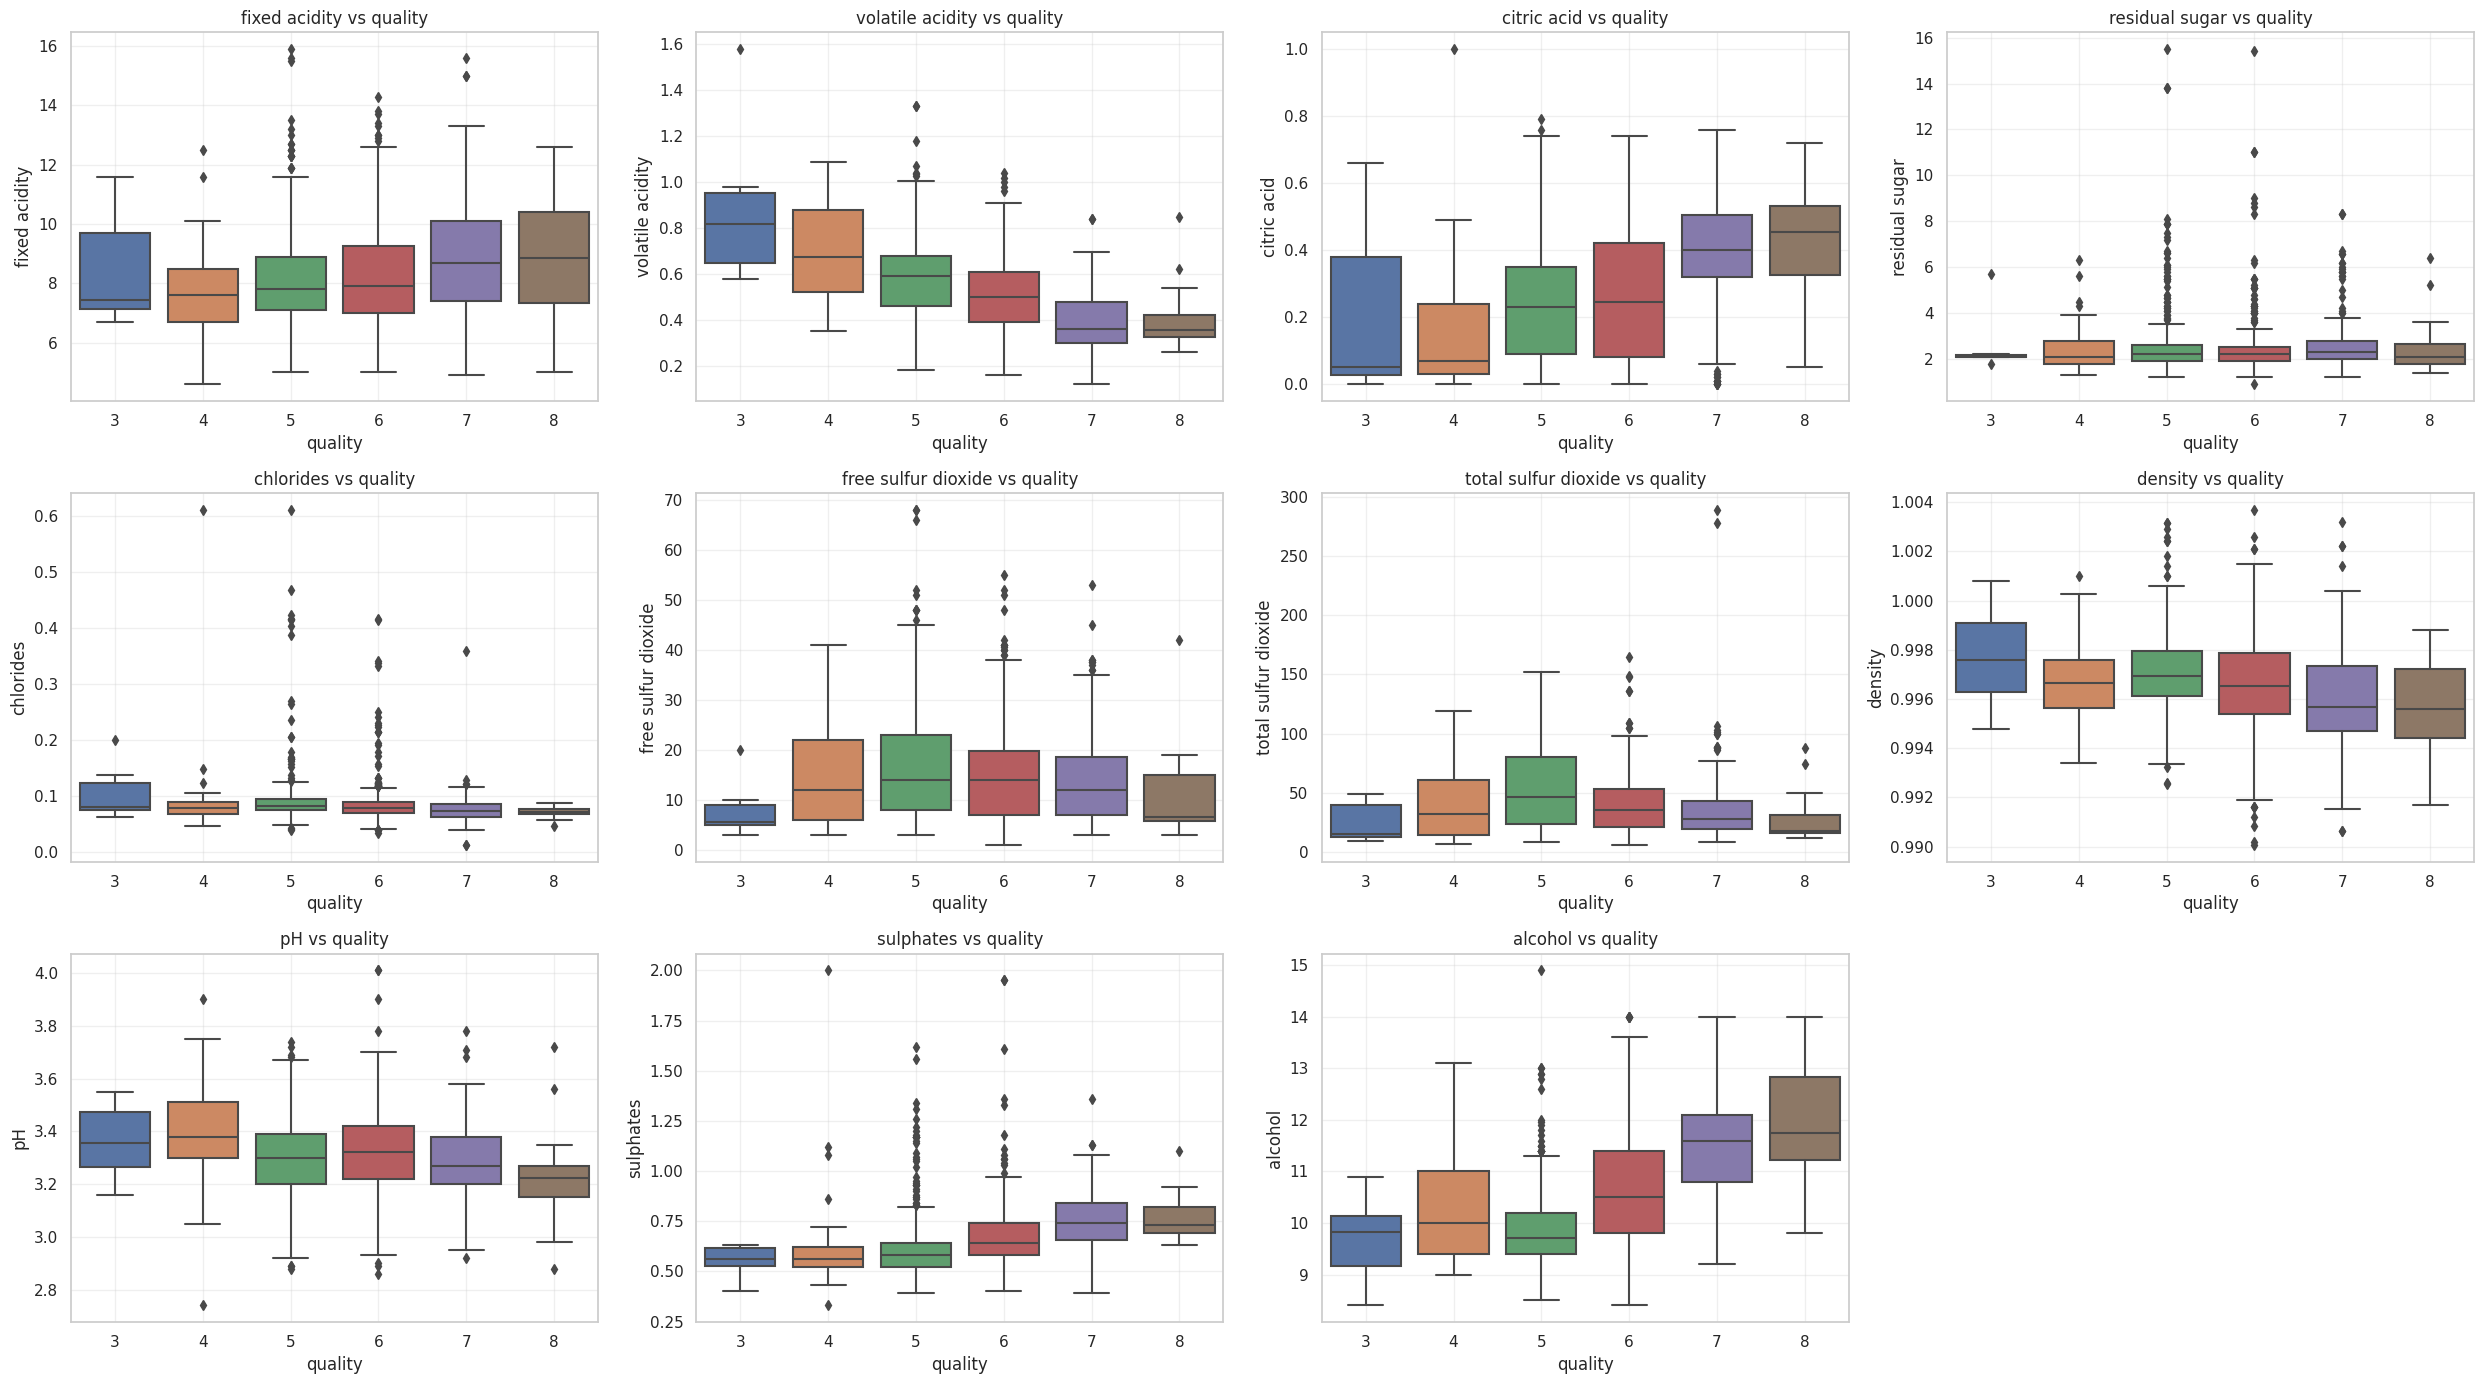

In [15]:
col = [c for c in df.columns if c != "quality" and c!= "Id"]
draw_multivariate_plot(df, plot_type="box", target="quality", cols=col, figsize=(25, 14))


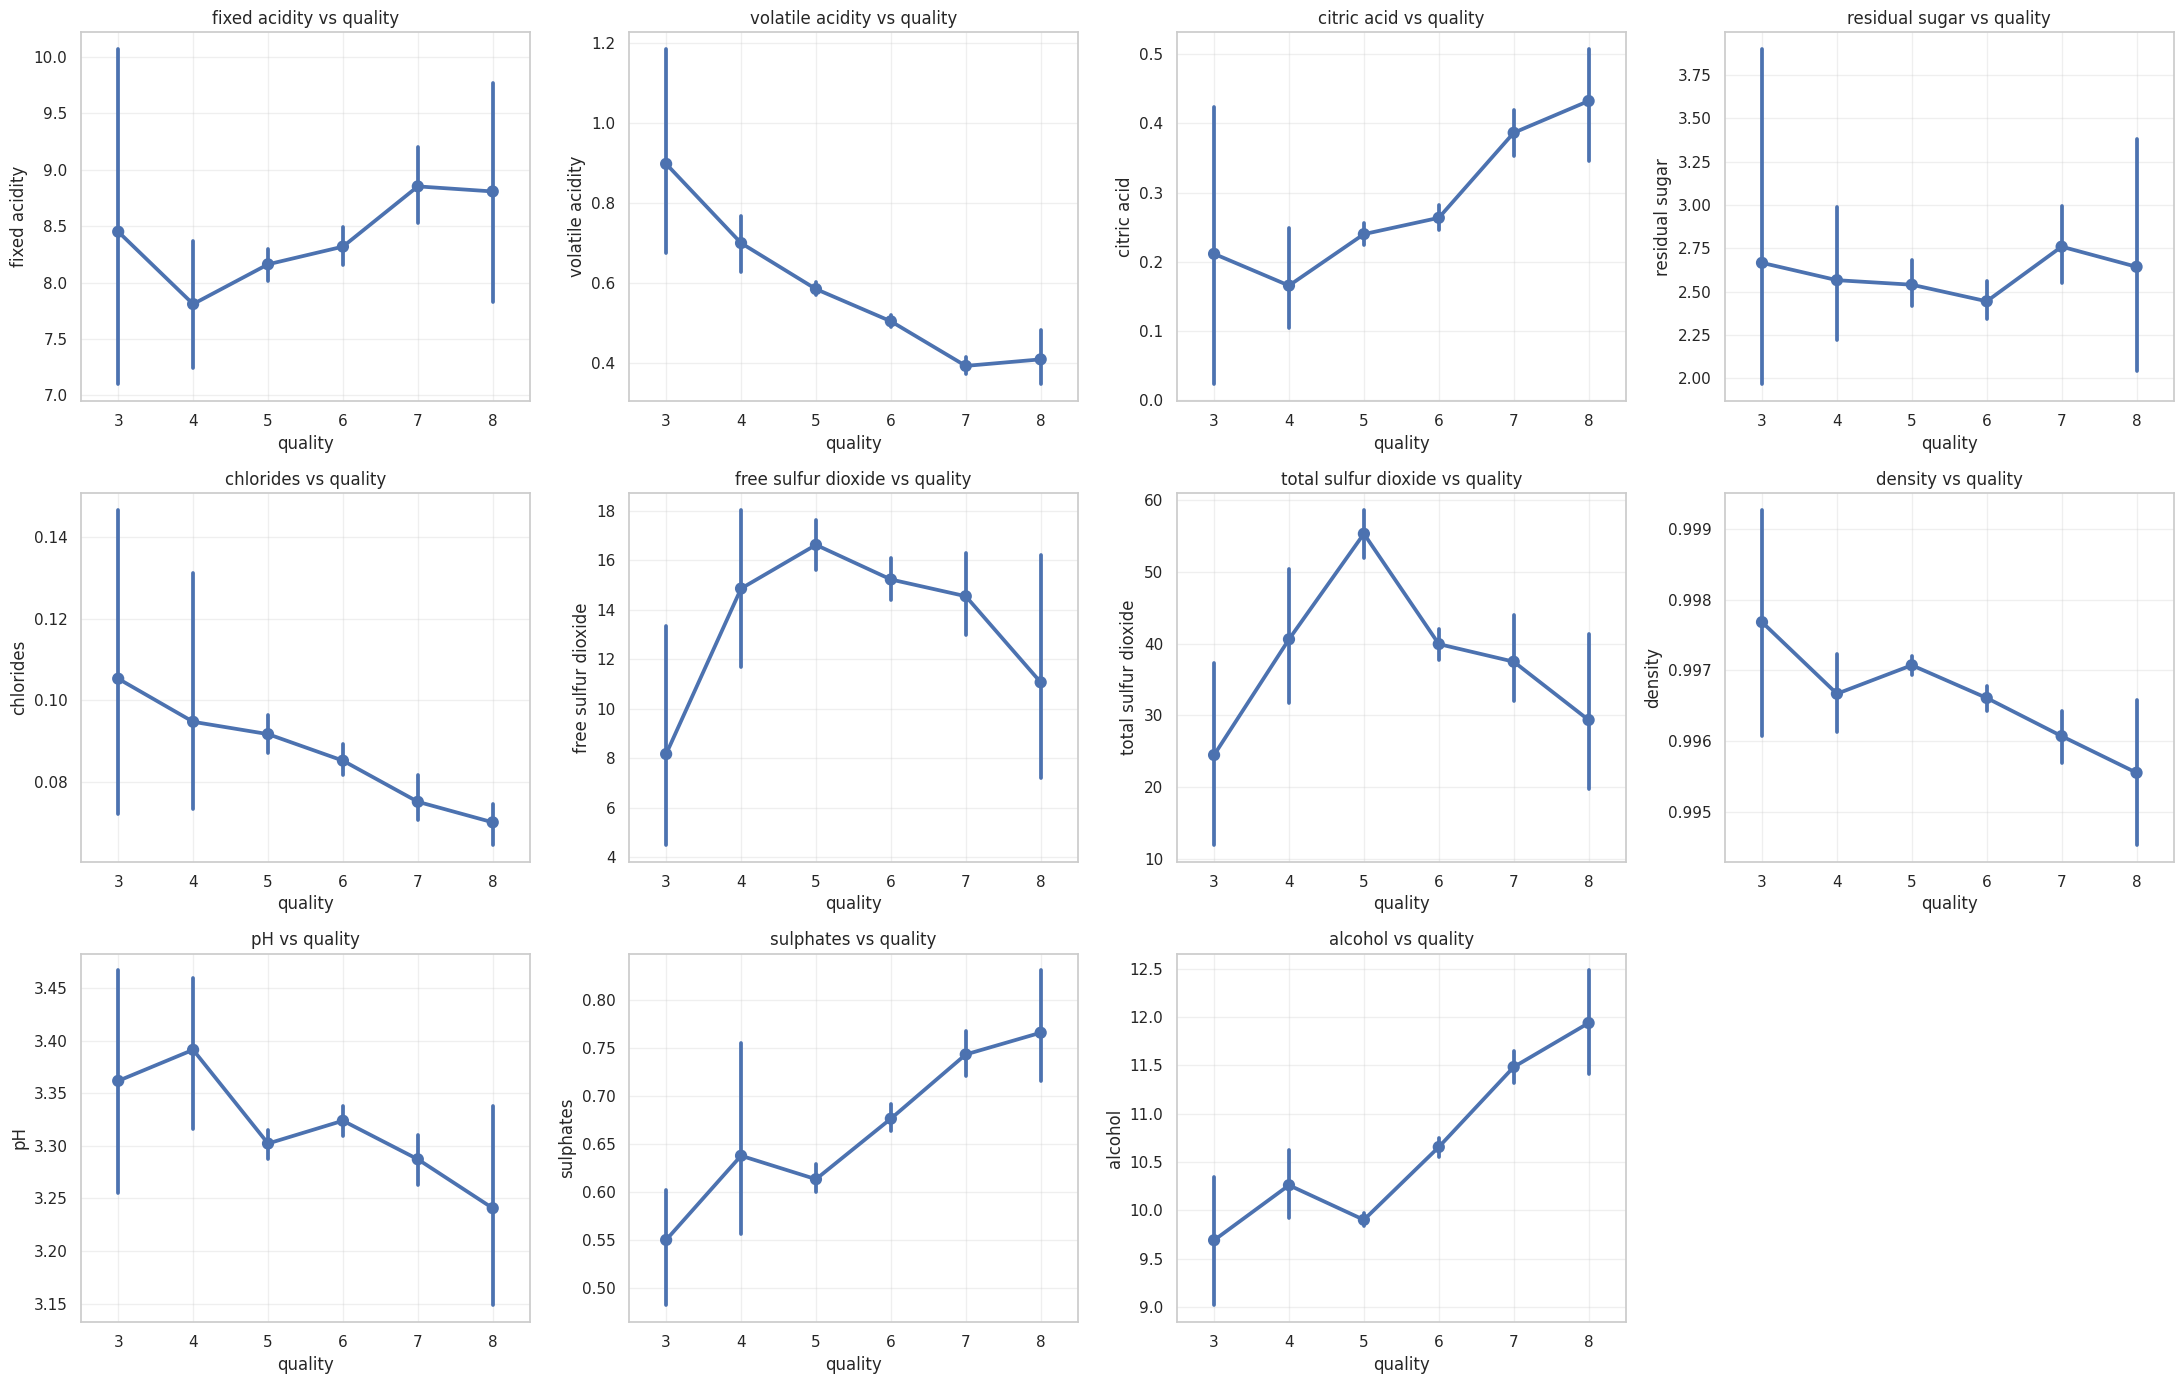

In [16]:
draw_multivariate_plot(df, plot_type="point", target="quality", cols=col, figsize=(22, 14))

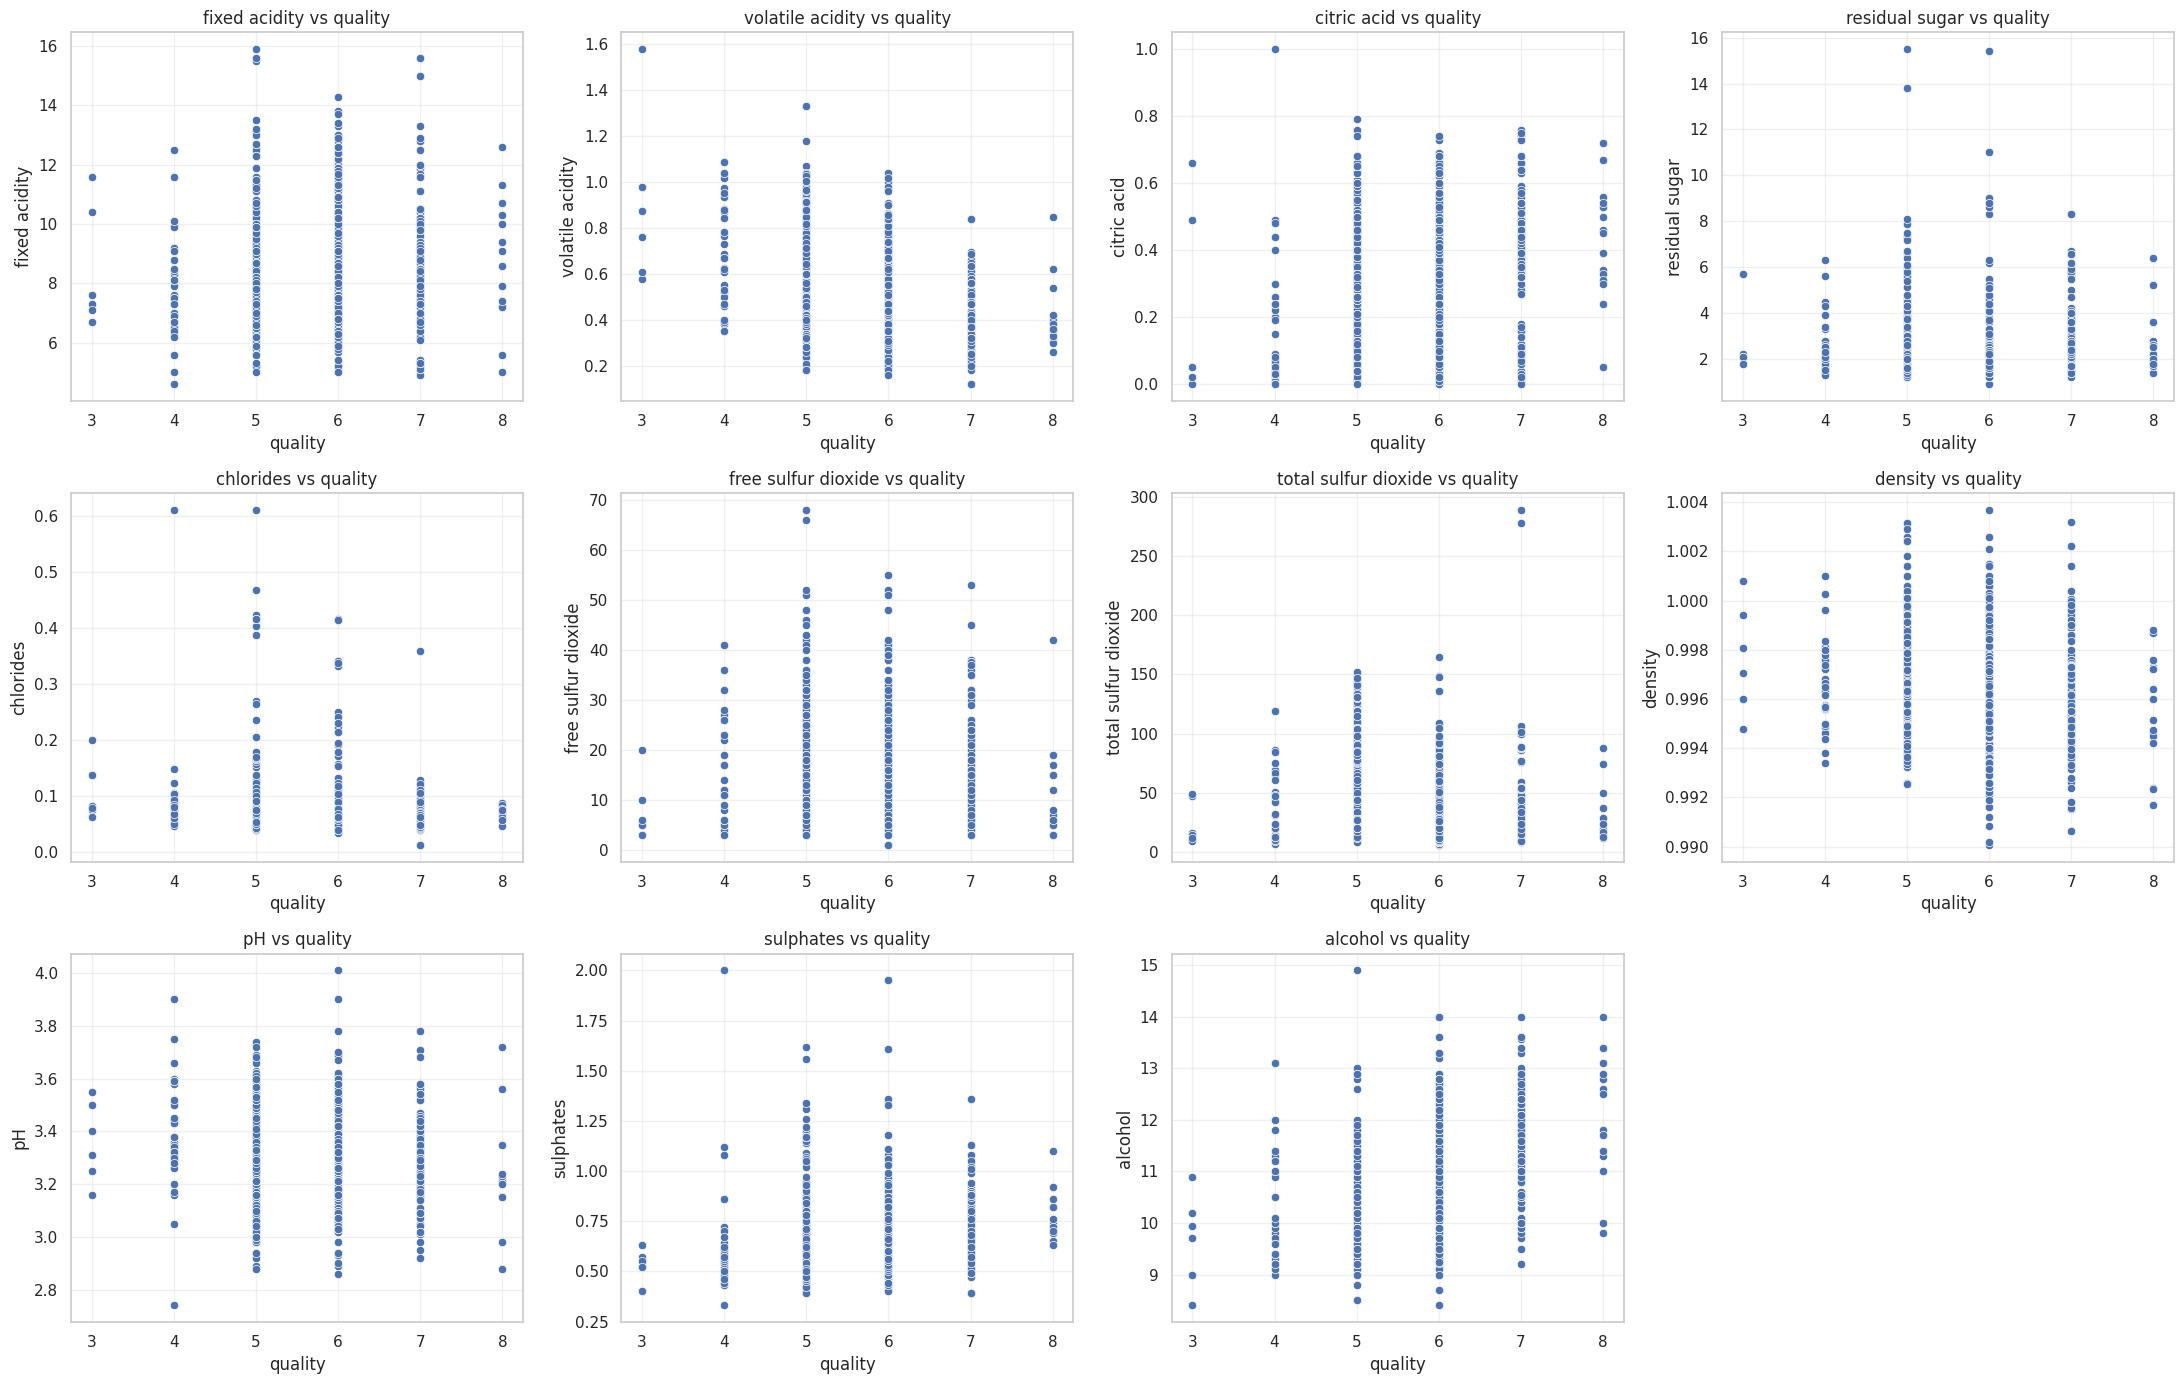

In [17]:
draw_multivariate_plot(df, plot_type="scatter", target="quality", cols=col, figsize=(22, 14))

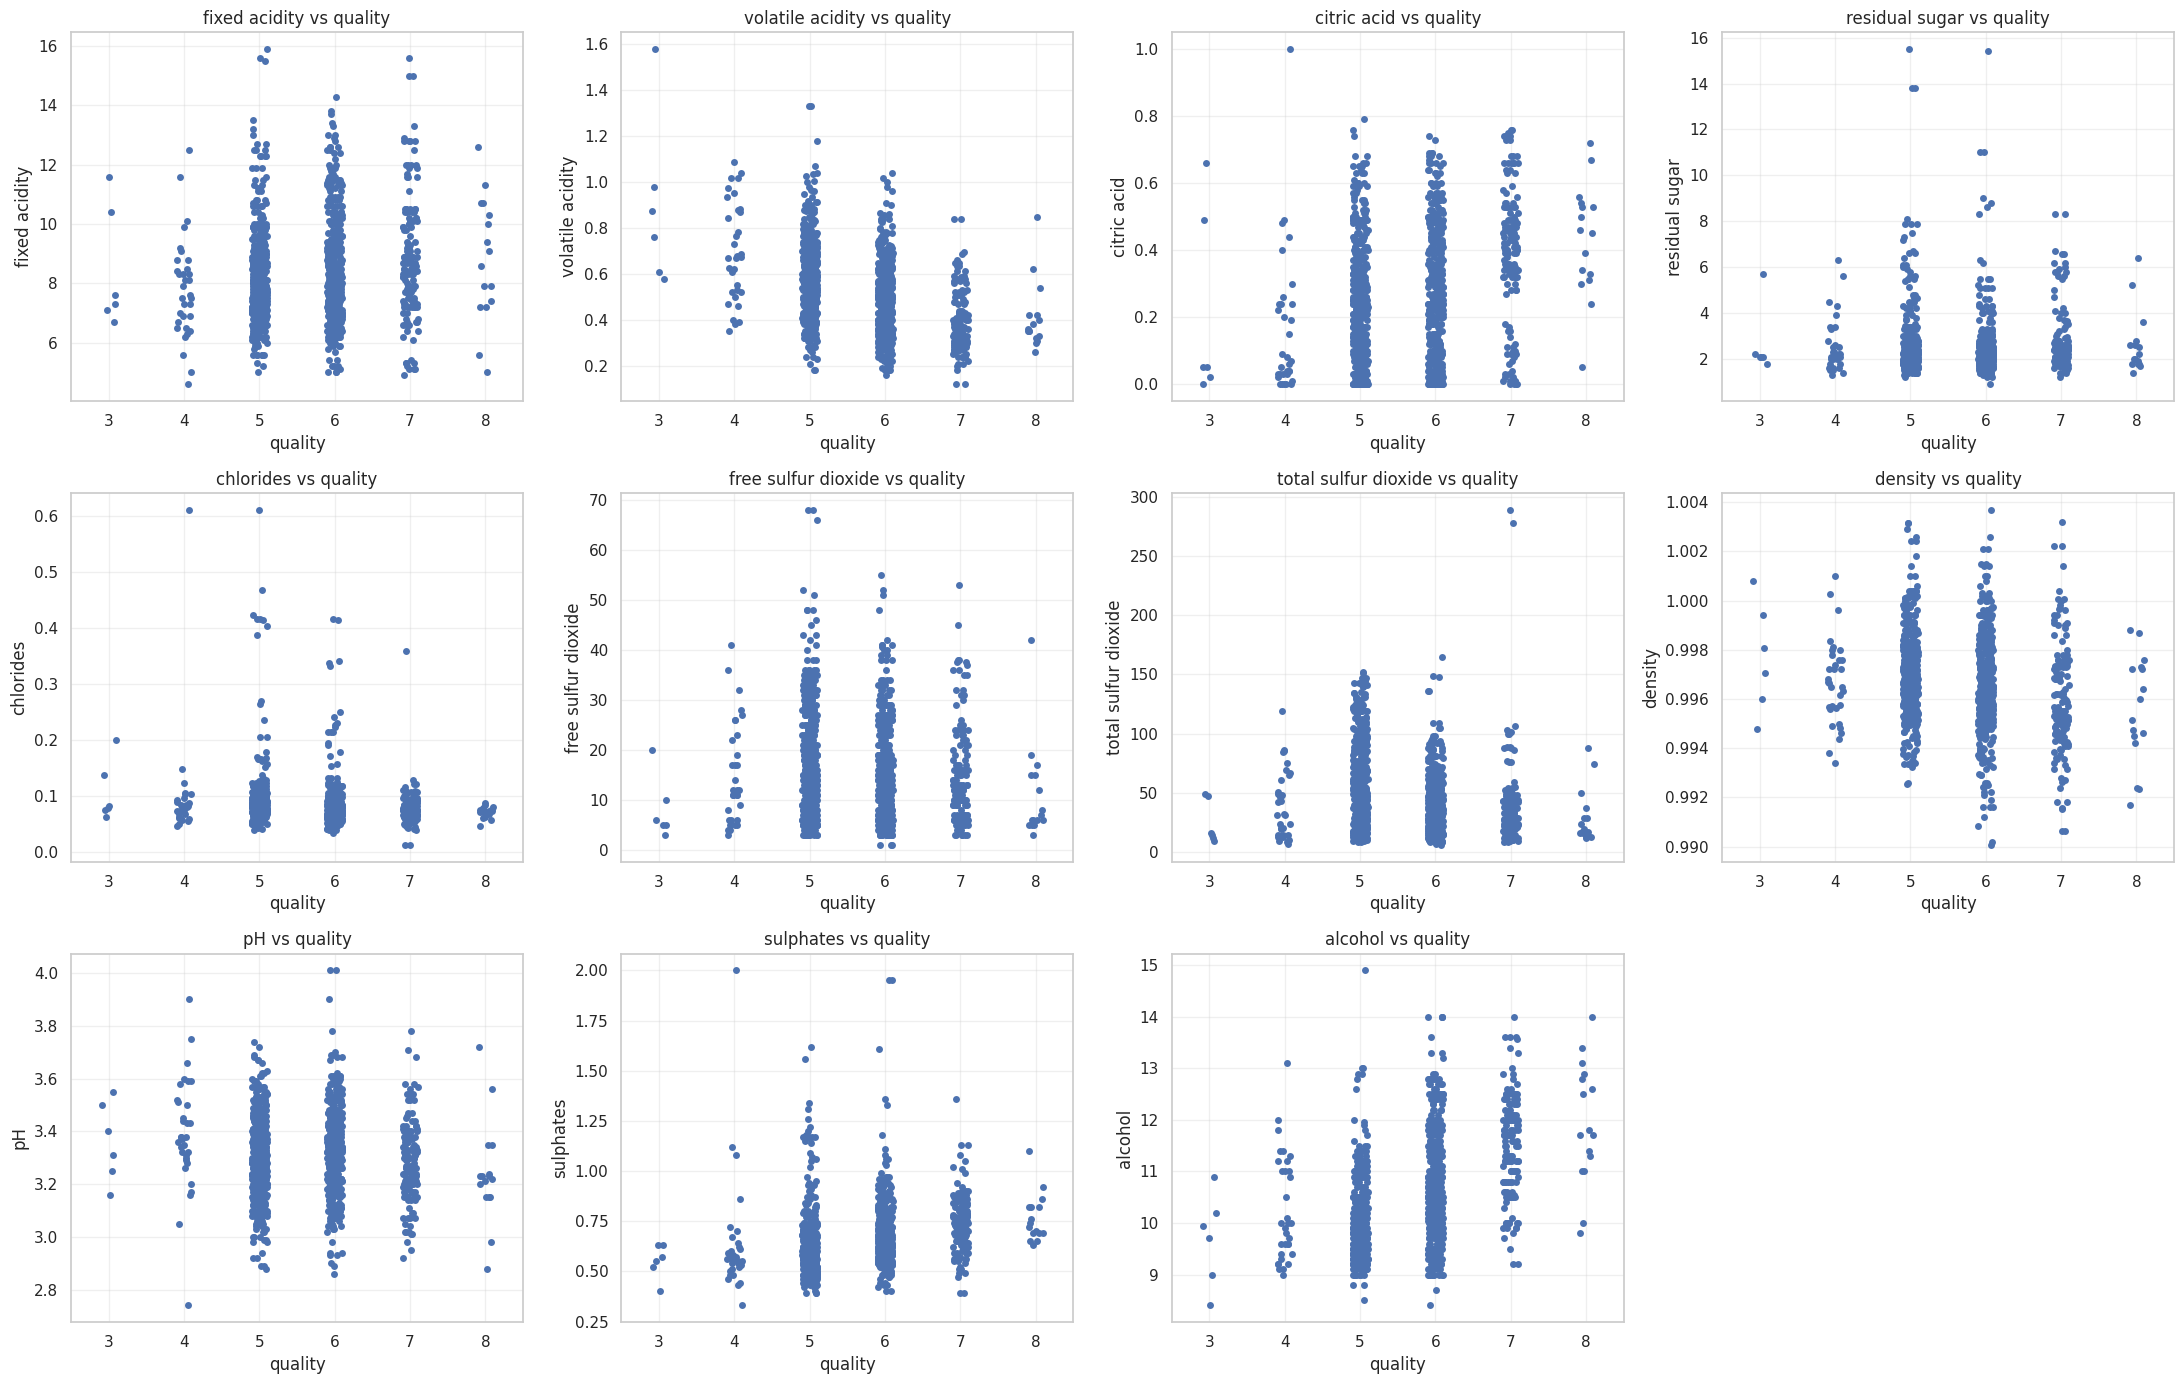

In [18]:
draw_multivariate_plot(df, plot_type="strip", target="quality", cols=col, figsize=(22, 14))

<Axes: xlabel='fixed acidity', ylabel='density'>

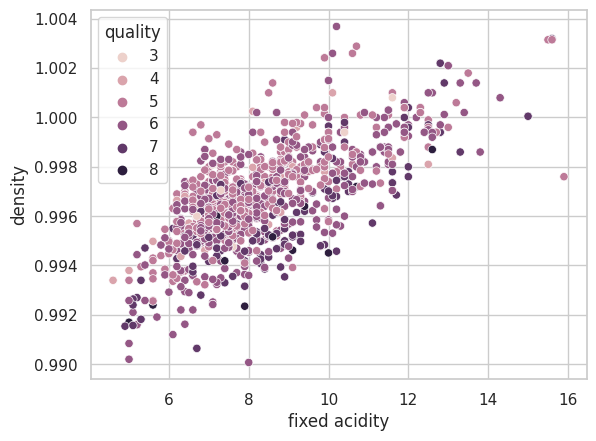

In [19]:
sns.scatterplot(x="fixed acidity",y="density",hue="quality",data=df)

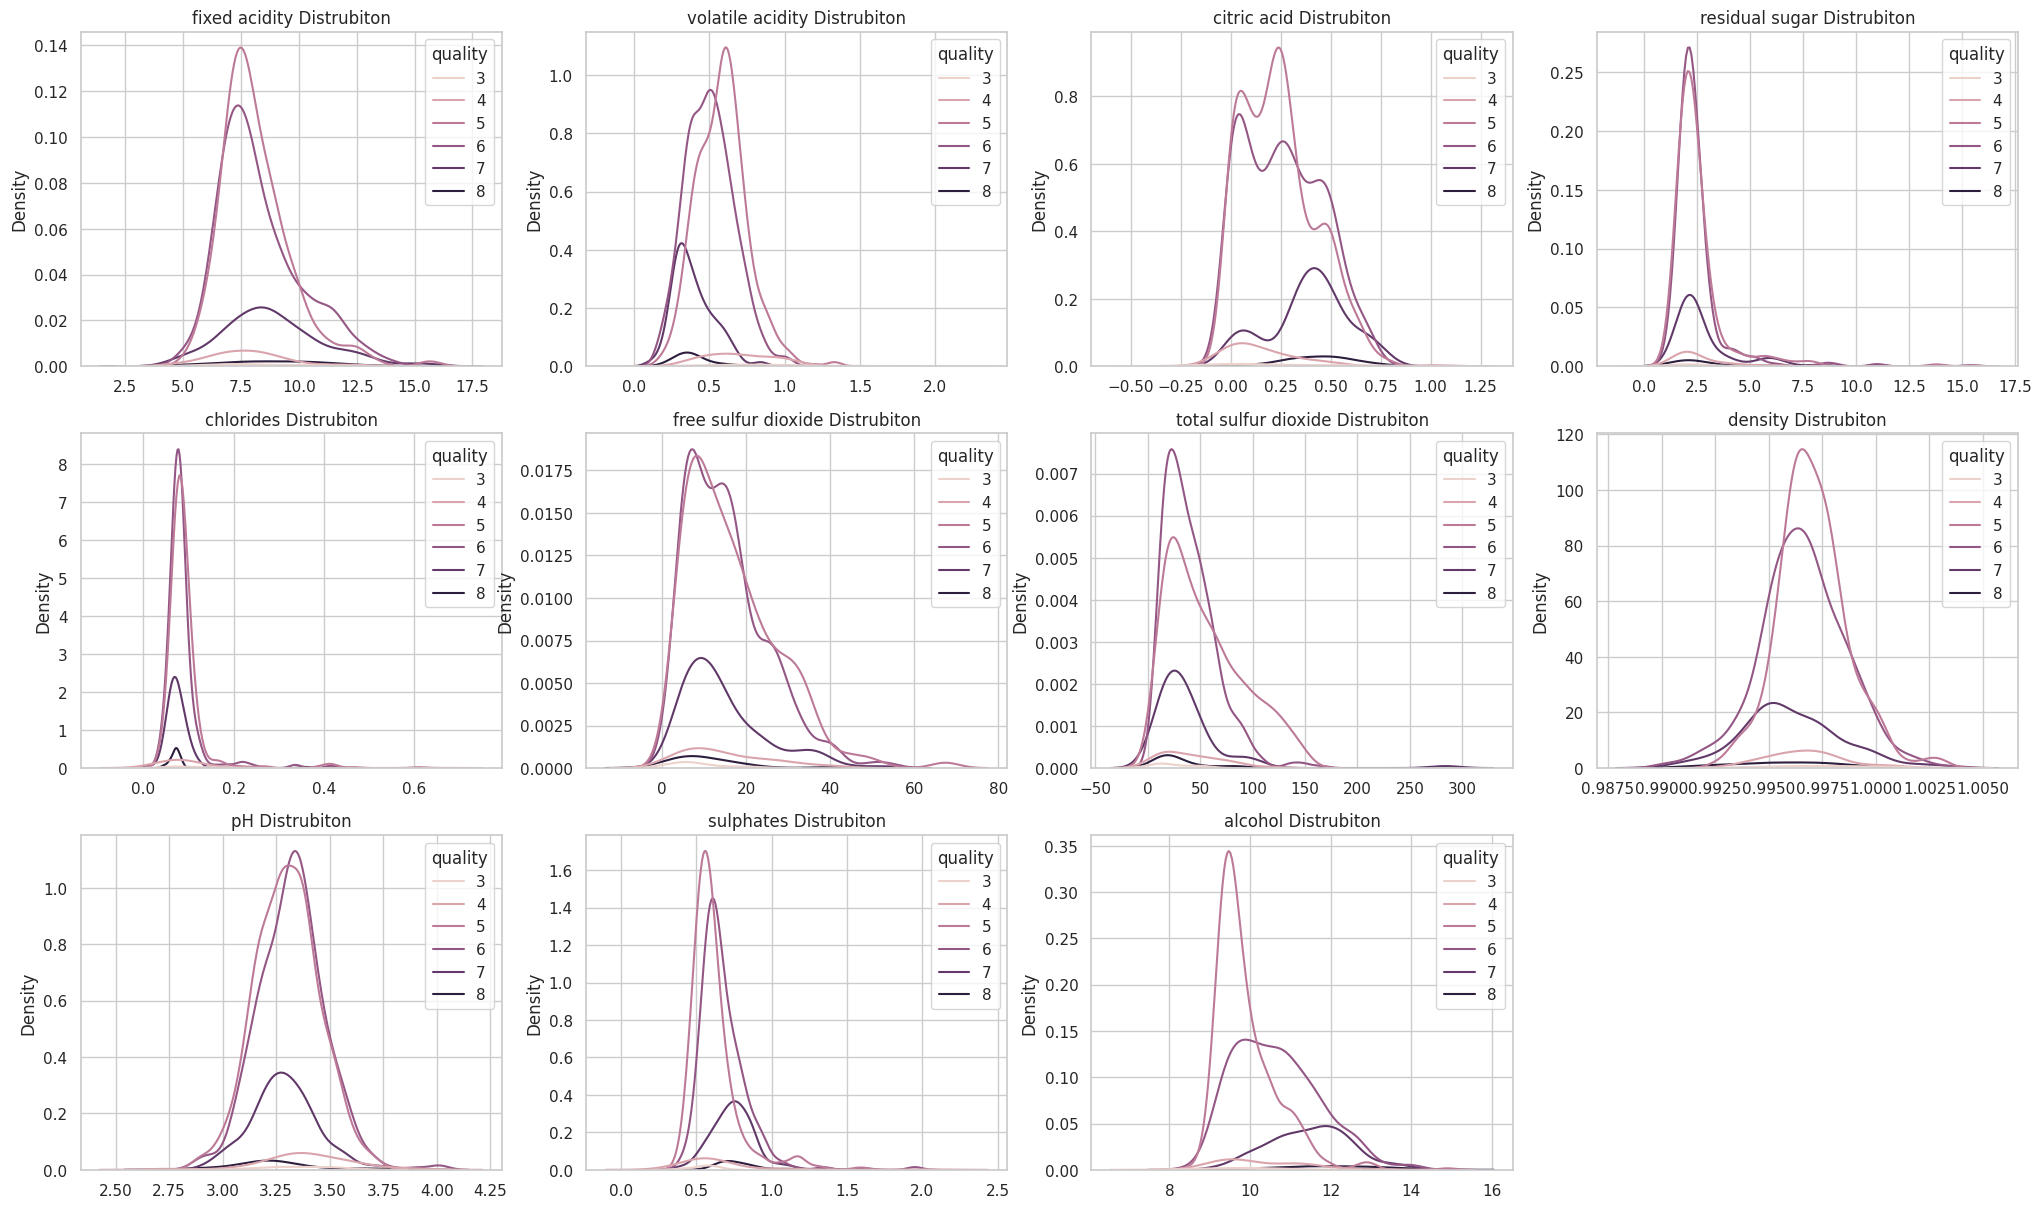

In [20]:

col = [c for c in df.columns if c != "quality" and c!= "Id"]
(fig,ax)=plt.subplots(4,4,figsize=(25,20))
ax =ax.flatten()

for i,column in enumerate(col):
    sns.kdeplot(
        data=df,
        x=column,
        hue=df.quality,
        ax=ax[i]
    )

    ax[i].set_title(f"{column} Distrubiton")
    ax[i].set_xlabel(None)

for i in range(i+1, len(ax)):
    ax[i].set_visible(False)


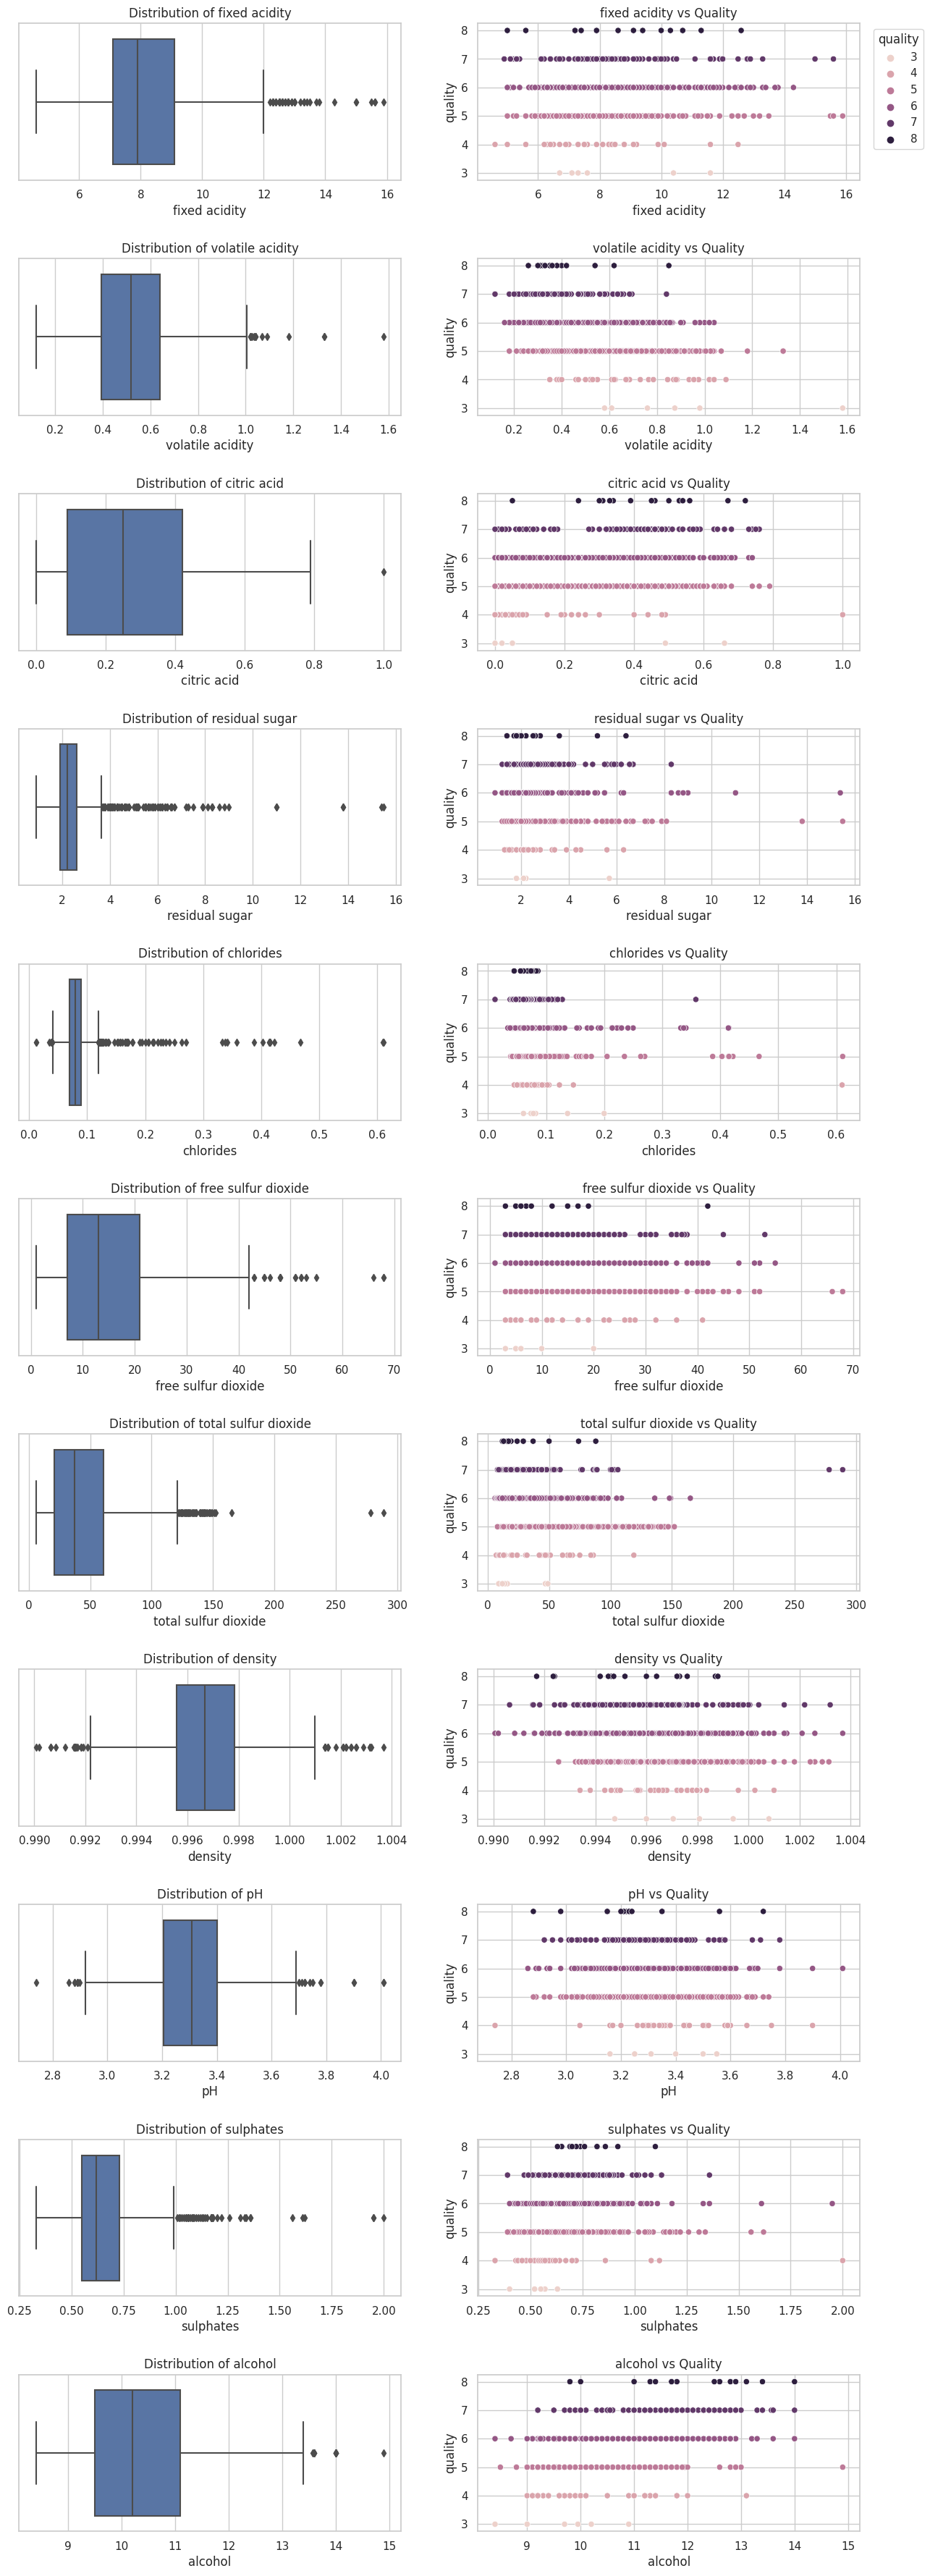

In [21]:
# Select all columns except 'quality' and 'Id'
columns = [c for c in df.columns if c not in ["quality", "Id"]]

fig, ax = plt.subplots(11, 2, figsize=(15, 45)) 
plt.subplots_adjust(hspace=0.5)   # Add some vertical space between rows

for i in range(11):
    # --- Left panel: Boxplot (distribution of each feature) ---
    sns.boxplot(x=columns[i], data=df, ax=ax[i, 0])
    ax[i, 0].set_title(f"Distribution of {columns[i]}")   
    
    # --- Right panel: Scatterplot (feature vs quality) ---
    sns.scatterplot(x=columns[i], y='quality', data=df, hue='quality', ax=ax[i, 1])
    ax[i, 1].set_title(f"{columns[i]} vs Quality")

    # Remove the legend from all scatterplots except the first one
    if i > 0:
        leg = ax[i, 1].get_legend()
        if leg:
            leg.remove()

# Move the legend from the first scatterplot outside the plot area (for cleaner layout)
handles, labels = ax[0, 1].get_legend_handles_labels()
ax[0, 1].legend(handles, labels, title="quality", 
                bbox_to_anchor=(1.02, 1), loc="upper left")

plt.show()


<div style="border: 3px solid purple; padding: 15px; border-radius: 8px; background-color: transparent;">

<h2>Conclusion</h2>

<p>After conducting a thorough exploratory data analysis on the Red Wine Quality dataset, several key insights emerged:</p>
<p><strong>Alcohol content</strong> shows the strongest positive correlation with wine quality. Higher alcohol levels tend to be associated with better-rated wines.</p>

<p><strong>Volatile acidity</strong> has a strong negative impact on quality. Wines with higher acidity are generally rated lower.</p>

<p><strong>Sulphates</strong> and <strong>citric acid</strong> also show moderate positive correlations with quality, suggesting their role in enhancing flavor and preservation.</p>

<p>Most wines in the dataset cluster around a quality score of 5–6, while truly high-quality (≥8) or very low-quality (≤3) wines are rare, showing the dataset is slightly imbalanced toward average wines.</p>

<p>Several features such as residual sugar, density, and pH show weak or negligible correlation with quality, implying limited influence.</p>

<p>Outlier analysis revealed a few extreme values in alcohol and volatile acidity, which may affect model performance if not treated.</p>

<p>The dataset is slightly imbalanced in terms of quality scores, which should be considered in future modeling efforts.</p>

<p>Overall, wine quality in this dataset appears to be driven most strongly by a combination of alcohol, acidity balance, and preservation factors. This suggests that improving these chemical properties—particularly raising alcohol within acceptable limits and lowering volatile acidity—could be key strategies for producing higher-quality red wines..</p>

</div>
